# Классификация текста (NLP) методом Наивного Байеса

## Описание проекта:

Цель этого проекта заключается в решении задачи классификации текстовых отзывов о фильмах с использованием метода Наивного Байеса. Мы рассматриваем отзывы, размеченные как положительные и отрицательные, для анализа их тональности и автоматического определения соответствующей категории.

## Цель проекта:

Построить модель, способную точно классифицировать отзывы на основе их содержимого и разметки, используя подход NLP (Natural Language Processing). Это позволит анализировать отзывы для получения более глубоких инсайтов о восприятии фильмов.

## Описание данных:

На входе используется набор текстовых данных, который содержит отзывы на фильмы. Отзывы размечены как позитивные или негативные.  
Источник: Стэнфордский корпус отзывов (http://ai.stanford.edu/~amaas/data/sentiment/).

## Исследование данных (EDA):  

Первоначальный анализ данных включает в себя изучение количества и распределения положительных и отрицательных отзывов. Также анализируется структура текста: длина отзывов, частота встречаемости ключевых слов и общие текстовые паттерны.

## Построение и оценка модели:  

Модель наивного байесовского классификатора строится с использованием библиотеки scikit-learn для обработки текстов. Модель обучается на тренировочной выборке и проверяется на тестовой выборке для оценки её точности и качества классификации.

## Визуализация результатов:  

Результаты классификации визуализируются в виде диаграмм и графиков, демонстрируя распределение точности и ошибки модели. Также возможно процедурное представление примеров предсказанных и фактических меток.

## Заключение:  

Проект завершен успешным созданием модели, которая точно классифицирует текстовые отзывы о фильмах на положительные и отрицательные. Дальнейшие улучшения могут включать использование дополнительных методов NLP и расширение набора данных для более обширного анализа.

---

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Данные

In [3]:
df = pd.read_csv('moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Задание: Проверьте, есть ли какие-либо отсутствующие значения в этих данных.**

In [5]:
# Напишите Ваш код в этой ячейке
df.isnull().sum()

label      0
review    35
dtype: int64

**Задание: Удалите отзывы о фильмах, текст которых принимает значение NaN**

In [6]:
df = df.dropna()

**Задание: Проверьте, есть ли какие-то отзывы с пустым текстом, но отличающимся от значения NaN. То есть, текст может быть таким: "" или "  " или какая-то другая строка из нескольких пробелов. Как это можно проверить? Это можно сделать разными способами. После того как Вы найдёте такие отзывы, удалите их из датафрейма. [В качестве подсказки можете использовать эту ссылку.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [7]:
df['review'].str.isspace().sum()

np.int64(27)

In [8]:
df[df['review'].str.isspace() == True]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [9]:
null_index = df[df['review'].str.isspace() == True].index

In [10]:
df = df.drop(index=null_index)

**Задание: Посчитайте количество строк для различных значений колонки label:**

In [11]:
# Напишите Ваш код в этой ячейке
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## Исследование данных (EDA) для мешка слов (bag of words)

**Бонусное задание: можете ли Вы с помощью модели CountVectorizer найти 20 наиболее часто встречающихся слов (которые не являются стоп-словами в английском языке), отдельно для каждого значения колонки label? Обратите внимание, что это бонусное задание, и здесь Вам нужно будет сделать нечто такое, что мы не проходили в лекциях. Однако мы надеемся, что с помощью поиска в Google или другом поисковике Вы сможете найти недостающие элементы.  [В качестве подсказки можете использовать эту ссылку.](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer(stop_words='english')

In [14]:
neg_sparse_matrix = cv.fit_transform(df[df['label']=='neg']['review'])
neg_freqs = zip(cv.get_feature_names_out(), neg_sparse_matrix.sum(axis=0).tolist()[0])
print("Top 20 words used for Negative reviews.")
print(sorted(neg_freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [15]:
pos_sparse_matrix = cv.fit_transform(df[df['label']=='pos']['review'])
pos_freqs = zip(cv.get_feature_names_out(), pos_sparse_matrix.sum(axis=0).tolist()[0])
print("Top 20 words used for Positive reviews.")
print(sorted(pos_freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Данные и обучение модели

**Задание: Разделите данные на признаки X и целевую переменную y, а также выполните разбиение на обучающий и тестовый наборы данных (train/test split). Вы можете использовать любые значения параметров, но если Вы захотите свериться с блокнотом с решениями, то в нём мы использовали `test_size=0.20, random_state=101`**

In [16]:
# Напишите Ваш код в этой ячейке
from sklearn.model_selection import train_test_split

In [28]:
X = df['review']
y = df['label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Обучение модели

**Задание: Создайте пайплайн, в котором Вы создадите вектора TF-IDF из сырых текстовых даных, а затем обучите модель машинного обучения, которую сами выберете. После создания пайплайна выполните его обучение на обучающем наборе данных.**

In [30]:
# Напишите Ваш код в этой ячейке
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [31]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [32]:
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**Задание: выведите на экран отчёт "classification report" и матрицу ошибок для результатов работы пайплайна на тестовых данных.**

In [33]:
# Напишите Ваш код в этой ячейке
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [34]:
y_pred = pipe.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



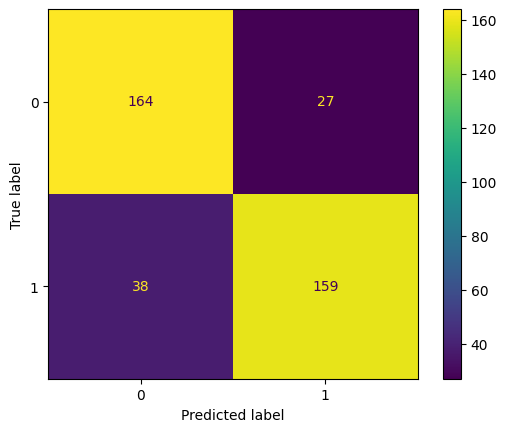

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [38]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [39]:
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [40]:
y_pred = pipe.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



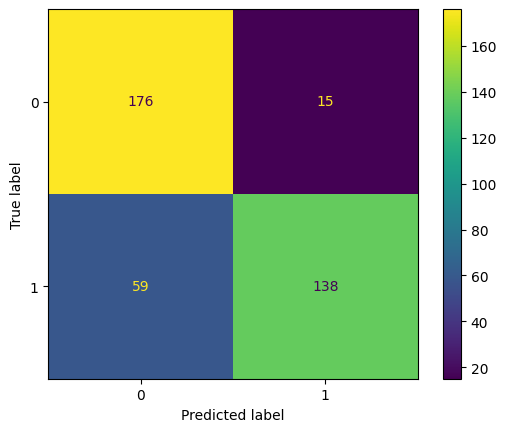

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

## Отличная работа!

---